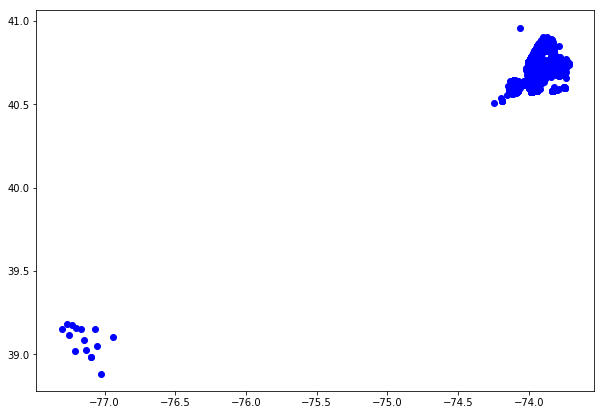

In [61]:
import csv
import matplotlib.pyplot as plt

raw = []
with open('ny-wifi.csv') as data:
    r = csv.reader(data)
    next(r, None)
    for row in r:
        p = row[1].split()
        lon = float(p[1][1:])
        lat = float(p[2][:-1])
        raw.append([lat, lon])

with open('md-wifi.csv') as data:
    r = csv.reader(data)
    next(r, None)
    for row in r:
        lat, lon = row[-1].split('(')[-1][:-1].split(',')
        lat, lon = float(lat), float(lon)
        raw.append([lat, lon])
        
        
plt.figure(figsize=(10, 7))
plt.plot([x[1] for x in raw], [x[0] for x in raw], 'bo')
plt.show()

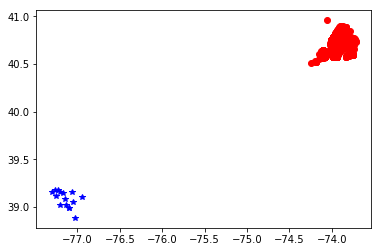

In [60]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(raw)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
markers = ['ro', 'b*']
for p, c in zip(raw, kmeans.labels_):
    plt.plot(p[1:], p[:1], markers[c])
plt.show()

In [68]:
print(kmeans.cluster_centers_)
print(kmeans.predict([[39.5, -77], [41, -74.5]]))

[[ 40.74210532 -73.94876684]
 [ 39.0809274  -77.1467036 ]]
[1 0]


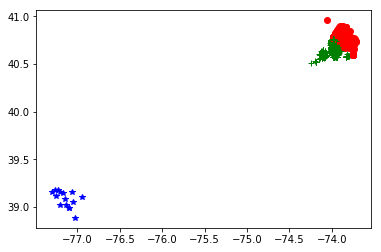

In [73]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
markers = ['ro', 'b*', 'g+', 'b*']
for p, c in zip(raw, kmeans.labels_):
    plt.plot(p[1:], p[:1], markers[c])
plt.show()